In [2]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

BASE_DIR = Path().resolve().parent
FIG_OUT_DIR = BASE_DIR / "presentation" / "data"
FIG_DATA_DIR = BASE_DIR / "presentation" / "data"


In [8]:
def open_json(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return data

sig_peak_json = FIG_DATA_DIR / "perc_peaks_identified_1330_0.json"
data = open_json(sig_peak_json)

exp_rt, exp_id, mz_perc, mz_rt_perc, mz_rt_im_perc = zip(*[d.values() for d in data])
data[0]


{'rt': 2400.240718,
 'exp_id': 'frame=22786_scan=452',
 'mz_perc_identified': 0.7641719472512416,
 'mz_perc_rt_identified': 0.2586915567734201,
 'mz_perc_rt_im_identified': 0.05125021407775304}

In [93]:
def plot_2_lines(
    x_axis, first, second, x_axis_label, y_axis_label, first_label, second_label, title
):
    plt.plot(x_axis, first, label=first_label)
    plt.plot(x_axis, second, label=second_label)

    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)

    plt.show()


def plot_3_lines(
    first_x_axis,
    first,
    second_x_axis,
    second,
    third_x_axis,
    third,
    x_axis_label,
    y_axis_label,
    first_label,
    second_label,
    third_label,
    title,
):
    plt.plot(first_x_axis, first, label=first_label)
    plt.plot(second_x_axis, second, label=second_label)
    plt.plot(third_x_axis, third, label=third_label)

    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)

    plt.show()


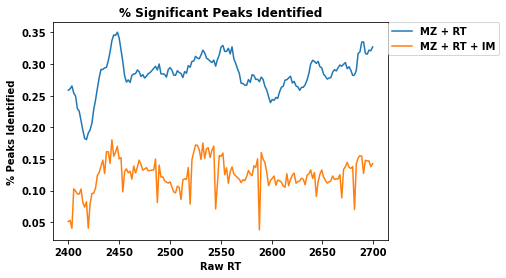

In [94]:
plot_2_lines(
    exp_rt,
    mz_rt_perc,
    mz_rt_im_perc,
    "Raw RT",
    "% Peaks Identified",
    "MZ + RT",
    "MZ + RT + IM",
    "% Significant Peaks Identified",
)


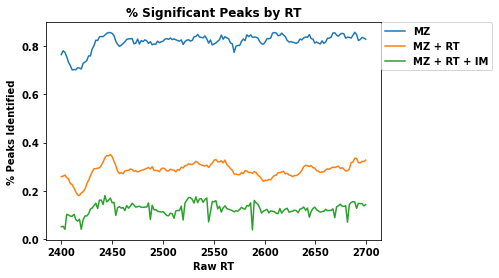

In [95]:
plot_3_lines(
    exp_rt,
    mz_perc,
    exp_rt,
    mz_rt_perc,
    exp_rt,
    mz_rt_im_perc,
    "Raw RT",
    "% Peaks Identified",
    "MZ",
    "MZ + RT",
    "MZ + RT + IM",
    "% Significant Peaks by RT",
)


### Look at intensities between sig and non-sig peaks

In [39]:
# Load intensity data from found and non-found peaks

def get_found_and_nonfound_int_10_150(filename):
    found_unfound_intensity_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_intensity_json)
    found_int_10_150 = list(map(float, data['found_intensity_perc_range_10_150']))
    nonfound_int_10_150 = list(map(float, data['nonfound_intensity_perc_range_10_150']))
    return found_int_10_150, nonfound_int_10_150

found_int_10_150, nonfound_int_10_150 = get_found_and_nonfound_int_10_150("20220131_MZ_RT_perc_intensity_found_nonfound_1330_0.json")

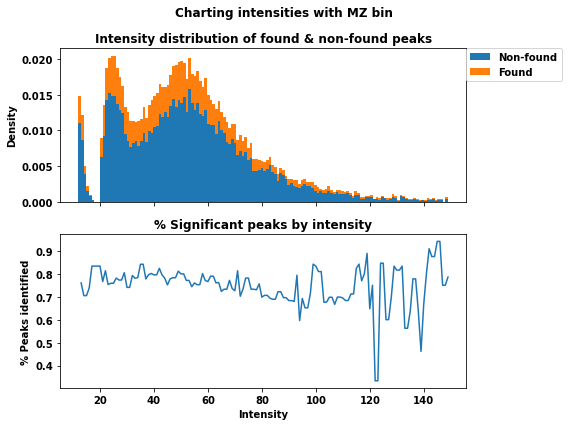

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 6)
fig.suptitle('Charting intensities with MZ bin')

ax1.hist([nonfound_int_10_150, found_int_10_150], label=['Non-found', 'Found'], stacked=True, density=True, bins=138)
ax1.set_title('Intensity distribution of found & non-found peaks')
ax1.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax1.set(ylabel="Density")

ax2.plot(rt_mz_window, perc_found_in_rt_mz_window, label="Found")
ax2.set_title('% Significant peaks by intensity')
# ax2.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax2.set(xlabel='Intensity', ylabel="% Peaks identified")

fig.tight_layout()

plt.savefig("sample.png", dpi=100)
plt.show()

In [54]:
# Load intensity data from found and non-found peaks

def get_window_found_and_nonfound_int_10_150(filename):
    found_unfound_intensity_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_intensity_json)
    rt_window = list(map(float, data["intensity_window_range_10_150"]))
    perc_found_in_rt_window = list(map(float, data['perc_found_intensity_range_10_150']))
    return rt_window, perc_found_in_rt_window

rt_mz_window, perc_found_in_rt_mz_window = get_window_found_and_nonfound_int_10_150("20220131_int_window_MZ_perc_intensity_found_nonfound_1330_0.json")
rt_mz_rt_window, perc_found_in_rt_mz_rt_window = get_window_found_and_nonfound_int_10_150("20220131_int_window_MZ_RT_perc_intensity_found_nonfound_1330_0.json")
rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window = get_window_found_and_nonfound_int_10_150("20220131_int_window_MZ_RT_IM_perc_intensity_found_nonfound_1330_0.json")

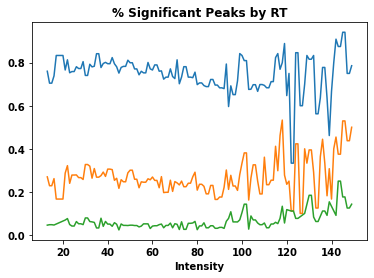

137 137 126


In [63]:
plt.plot(rt_mz_window, perc_found_in_rt_mz_window)
plt.plot(rt_mz_rt_window, perc_found_in_rt_mz_rt_window)
plt.plot(rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window)
plt.title('% Significant Peaks by RT')
plt.xlabel('Intensity')
plt.show()

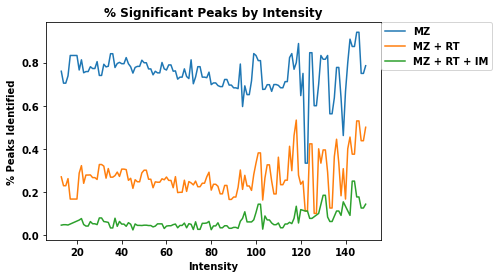

In [96]:
plot_3_lines(
    rt_mz_window,
    perc_found_in_rt_mz_window,
    rt_mz_rt_window,
    perc_found_in_rt_mz_rt_window,
    rt_mz_rt_im_window,
    perc_found_in_rt_mz_rt_im_window,
    "Intensity",
    "% Peaks Identified",
    "MZ",
    "MZ + RT",
    "MZ + RT + IM",
    "% Significant Peaks by Intensity",
)